### 6.1 数据包、依赖包下载及导入 

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
np.random.seed(10)

In [3]:
from keras.datasets import mnist

In [4]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [5]:
print ('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [6]:
print ('train data=',x_train_image.shape)
print(' test data=',y_train_label.shape)

train data= (60000, 28, 28)
 test data= (60000,)


In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

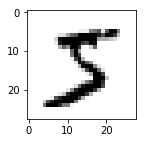

In [8]:
plot_image(x_train_image[0])

In [9]:
print(y_train_label[0])

5


In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = 'label='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
        

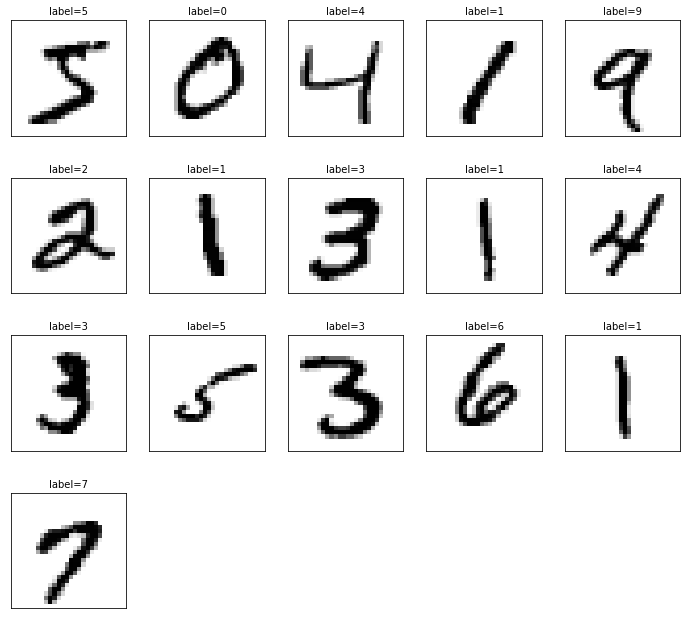

In [11]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,num=16)

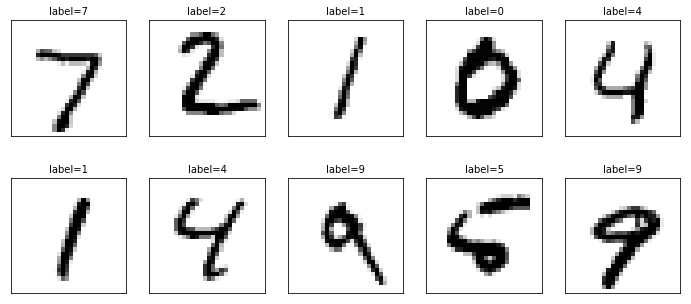

In [12]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

### 6.2 针对设计的深度神经网络结构进行数据预处理

In [13]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [14]:
print(x_Train.shape)

(60000, 784)


In [15]:
print(x_Test.shape)

(10000, 784)


In [16]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [18]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 6.3 label数据预处理

In [19]:
y_train_label[0]

5

In [20]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [21]:
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [22]:
y_TrainOneHot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 7.3 建立模型

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(units=256,
               input_dim = 784,
               kernel_initializer='normal',
               activation='relu'))

model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### 7.4 指定参数并训练

In [29]:
train_history = model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2184 - val_acc: 0.9407
Epoch 2/10
 - 2s - loss: 0.1911 - acc: 0.9454 - val_loss: 0.1558 - val_acc: 0.9558
Epoch 3/10
 - 2s - loss: 0.1356 - acc: 0.9616 - val_loss: 0.1263 - val_acc: 0.9648
Epoch 4/10
 - 2s - loss: 0.1028 - acc: 0.9703 - val_loss: 0.1120 - val_acc: 0.9681
Epoch 5/10
 - 2s - loss: 0.0812 - acc: 0.9772 - val_loss: 0.0982 - val_acc: 0.9716
Epoch 6/10
 - 2s - loss: 0.0659 - acc: 0.9818 - val_loss: 0.0935 - val_acc: 0.9722
Epoch 7/10
 - 2s - loss: 0.0544 - acc: 0.9851 - val_loss: 0.0911 - val_acc: 0.9736
Epoch 8/10
 - 2s - loss: 0.0458 - acc: 0.9879 - val_loss: 0.0828 - val_acc: 0.9761
Epoch 9/10
 - 2s - loss: 0.0380 - acc: 0.9904 - val_loss: 0.0819 - val_acc: 0.9761
Epoch 10/10
 - 2s - loss: 0.0317 - acc: 0.9916 - val_loss: 0.0810 - val_acc: 0.9759


In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

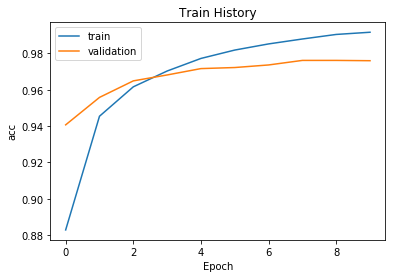

In [31]:
show_train_history(train_history,'acc','val_acc')

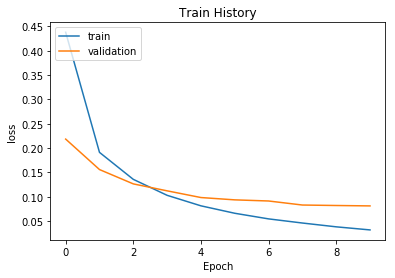

In [32]:
show_train_history(train_history,'loss','val_loss')

### 7.5 以测试数据评估准确性

In [33]:
scores = model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 51us/step

loss= 0.07579956012084149
accuracy= 0.9756


### 7.6进行预测

In [34]:
prediction = model.predict_classes(x_Test)

In [35]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

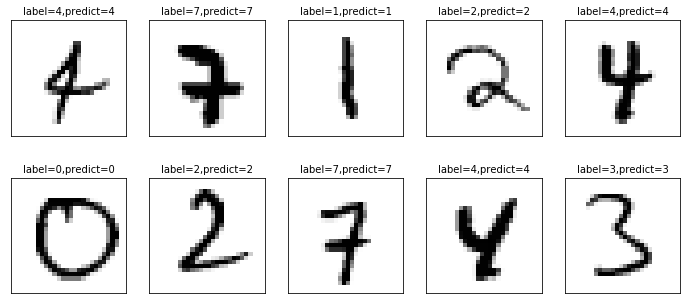

In [36]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=300)

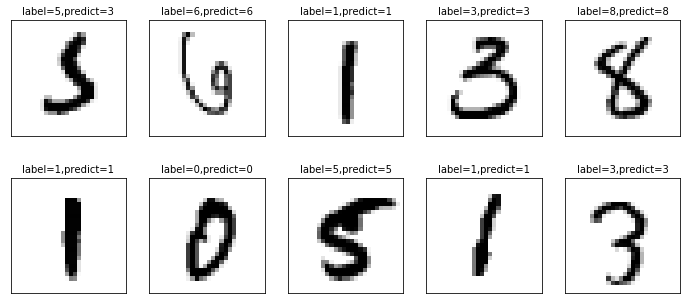

In [37]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

### 7.7 显示混淆矩阵

In [38]:
import pandas as pd

In [40]:
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1010,0,1,0,2,4,9,0
3,0,0,4,993,0,1,0,3,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,15,1,852,7,2,9,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,7,1,0,0,987,7,8
8,5,0,3,6,0,1,1,2,955,1


In [41]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [42]:
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [43]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


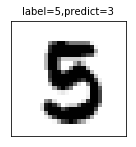

In [45]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,6043,num=1)

In [46]:
model_version_2 = Sequential()

In [47]:
#将隐藏层和输入层加入模型     隐藏层神经元改为100个

In [48]:
model_version_2.add(Dense(units=100,input_dim=784,kernel_initializer='normal',activation='relu'))

In [49]:
model_version_2.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [51]:
print(model_version_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
model_version_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
train_history = model_version_2.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.5833 - acc: 0.8527 - val_loss: 0.2826 - val_acc: 0.9226
Epoch 2/10
 - 1s - loss: 0.2565 - acc: 0.9271 - val_loss: 0.2135 - val_acc: 0.9402
Epoch 3/10
 - 1s - loss: 0.1959 - acc: 0.9445 - val_loss: 0.1726 - val_acc: 0.9508
Epoch 4/10
 - 1s - loss: 0.1583 - acc: 0.9545 - val_loss: 0.1501 - val_acc: 0.9577
Epoch 5/10
 - 1s - loss: 0.1324 - acc: 0.9627 - val_loss: 0.1430 - val_acc: 0.9583
Epoch 6/10
 - 1s - loss: 0.1134 - acc: 0.9675 - val_loss: 0.1242 - val_acc: 0.9628
Epoch 7/10
 - 1s - loss: 0.0996 - acc: 0.9716 - val_loss: 0.1167 - val_acc: 0.9648
Epoch 8/10
 - 1s - loss: 0.0870 - acc: 0.9757 - val_loss: 0.1104 - val_acc: 0.9648
Epoch 9/10
 - 1s - loss: 0.0776 - acc: 0.9779 - val_loss: 0.1047 - val_acc: 0.9684
Epoch 10/10
 - 1s - loss: 0.0691 - acc: 0.9804 - val_loss: 0.1039 - val_acc: 0.9690


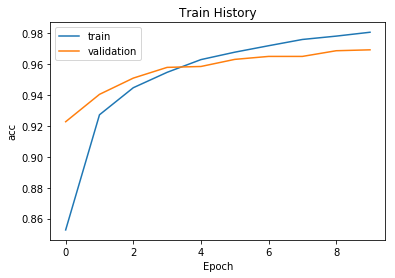

In [54]:
show_train_history(train_history,'acc','val_acc')

In [64]:
scores = model_version_2.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 43us/step

loss= 0.09604649416524917
accuracy= 0.9705


#### 7.9 多层感知器加入DropOut功能以避免过度拟合

In [56]:
from keras.layers import Dropout

In [57]:
model_version_3 = Sequential()
model_version_3.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model_version_3.add(Dropout(0.5))
model_version_3.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [58]:
print(model_version_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model_version_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model_version_3.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.3569 - acc: 0.8930 - val_loss: 0.1618 - val_acc: 0.9547
Epoch 2/10
 - 8s - loss: 0.1601 - acc: 0.9533 - val_loss: 0.1180 - val_acc: 0.9646
Epoch 3/10
 - 8s - loss: 0.1155 - acc: 0.9661 - val_loss: 0.0971 - val_acc: 0.9704
Epoch 4/10
 - 8s - loss: 0.0915 - acc: 0.9728 - val_loss: 0.0872 - val_acc: 0.9728
Epoch 5/10
 - 8s - loss: 0.0746 - acc: 0.9774 - val_loss: 0.0798 - val_acc: 0.9765
Epoch 6/10
 - 8s - loss: 0.0643 - acc: 0.9795 - val_loss: 0.0761 - val_acc: 0.9774
Epoch 7/10
 - 8s - loss: 0.0553 - acc: 0.9834 - val_loss: 0.0754 - val_acc: 0.9776
Epoch 8/10
 - 8s - loss: 0.0467 - acc: 0.9857 - val_loss: 0.0715 - val_acc: 0.9784
Epoch 9/10
 - 8s - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0693 - val_acc: 0.9794
Epoch 10/10
 - 8s - loss: 0.0379 - acc: 0.9881 - val_loss: 0.0663 - val_acc: 0.9808


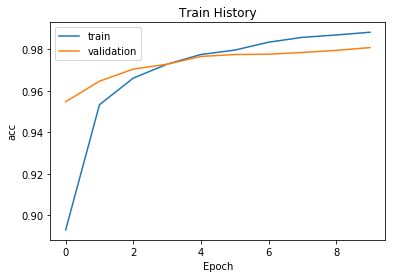

In [62]:
show_train_history(train_history,'acc','val_acc')

In [63]:
#训练的准确率和验证的准确率差距变小，过拟合程度已经减轻

In [65]:
scores = model_version_3.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 137us/step

loss= 0.059347111318213866
accuracy= 0.9824


In [66]:
#加入Dropout层不仅可以改善过拟合   还可以提高准确率

### 7.10 建立过层感知器模型包含两个隐藏层

In [67]:
model_version_4 = Sequential()
model_version_4.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model_version_4.add(Dropout(0.5))
model_version_4.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model_version_4.add(Dropout(0.5))
model_version_4.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [68]:
print(model_version_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model_version_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model_version_4.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 19s - loss: 0.3746 - acc: 0.8820 - val_loss: 0.1341 - val_acc: 0.9594
Epoch 2/10
 - 20s - loss: 0.1605 - acc: 0.9497 - val_loss: 0.1040 - val_acc: 0.9673
Epoch 3/10
 - 19s - loss: 0.1206 - acc: 0.9635 - val_loss: 0.0922 - val_acc: 0.9717
Epoch 4/10
 - 19s - loss: 0.0977 - acc: 0.9700 - val_loss: 0.0809 - val_acc: 0.9751
Epoch 5/10
 - 18s - loss: 0.0819 - acc: 0.9737 - val_loss: 0.0815 - val_acc: 0.9759
Epoch 6/10
 - 19s - loss: 0.0754 - acc: 0.9762 - val_loss: 0.0721 - val_acc: 0.9790
Epoch 7/10
 - 18s - loss: 0.0669 - acc: 0.9786 - val_loss: 0.0757 - val_acc: 0.9783
Epoch 8/10
 - 18s - loss: 0.0627 - acc: 0.9797 - val_loss: 0.0750 - val_acc: 0.9781
Epoch 9/10
 - 18s - loss: 0.0573 - acc: 0.9815 - val_loss: 0.0755 - val_acc: 0.9792
Epoch 10/10
 - 18s - loss: 0.0520 - acc: 0.9832 - val_loss: 0.0714 - val_acc: 0.9804


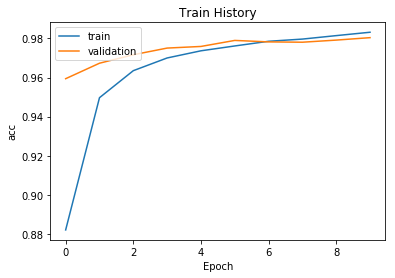

In [70]:
show_train_history(train_history,'acc','val_acc')

In [71]:
scores = model_version_4.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 236us/step

loss= 0.06460094852992042
accuracy= 0.9811
